In [153]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [155]:
# Load your dataset
data = pd.read_excel('Cleaned_Steam_Dataset.xlsx')

In [157]:
# Select relevant columns for clustering
df = data[['User Reviews Count', 'Followers', 'User Ratings']]

In [159]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


In [161]:
# Define KMeans parameters
n_clusters = 3  # Optimal number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

In [163]:
# Fit KMeans
cluster_labels = kmeans.fit_predict(df_scaled)


In [165]:
# Add cluster labels to the original dataset
data['Cluster'] = cluster_labels

In [167]:
# Count the number of unique clusters
unique_clusters = len(set(cluster_labels))

if unique_clusters != n_clusters:
    print(f"Warning: Expected {n_clusters} clusters but found {unique_clusters} clusters. Adjust parameters as needed.")

In [169]:
# Group by clusters and calculate the mean for numeric columns only
cluster_stats = data.groupby('Cluster').mean(numeric_only=True).reset_index()

In [171]:
# Display cluster statistics
print("Cluster Statistics:")
print(cluster_stats)

Cluster Statistics:
   Cluster  Game's Age (Days)      Price     Followers  \
0        0        2158.774725  38.497143  3.045818e+05   
1        1        1866.980769  42.314231  2.120318e+05   
2        2        2316.400000  52.462800  1.491539e+06   

   User Review (On a scale of 1 to 7)  User Reviews Count  \
0                            6.285714       123401.247253   
1                            3.615385        70463.211538   
2                            6.320000       704944.120000   

   Net Revenue (in million $)  User Ratings  
0                   78.038462      9.296703  
1                   68.038462      6.076923  
2                  383.080000      9.320000  


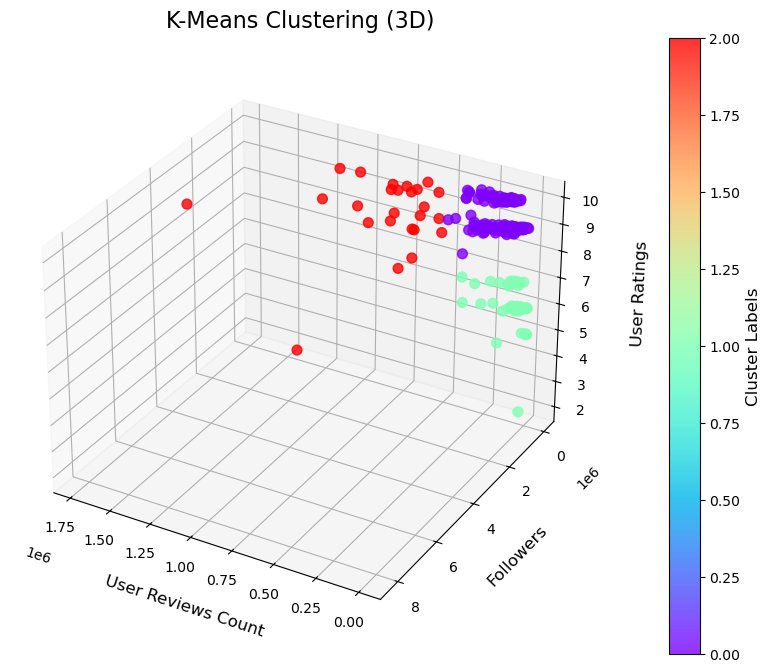

In [173]:
# 3D Visualization with enhancements
fig = plt.figure(figsize=(10, 8))  # Increased figure size
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with enhanced point size and transparency
scatter = ax.scatter(
    df['User Reviews Count'], 
    df['Followers'], 
    df['User Ratings'], 
    c=cluster_labels, 
    cmap='rainbow', 
    s=50,  # Adjust point size
    alpha=0.8  # Add transparency for better visual depth
)

# Adding a color bar
colorbar = plt.colorbar(scatter, ax=ax, pad=0.1)
colorbar.set_label('Cluster Labels', fontsize=12)

# Setting axis labels with increased font size and labelpad adjustment
ax.set_xlabel('User Reviews Count', fontsize=12, labelpad=10)
ax.set_ylabel('Followers', fontsize=12, labelpad=10)
ax.set_zlabel('User Ratings', fontsize=12, labelpad=15)  # Adjusted labelpad for visibility

# Customizing ticks
ax.tick_params(axis='both', which='major', labelsize=10)

# Adding gridlines for better visualization
ax.grid(True)

# Setting title with customization
ax.set_title('K-Means Clustering (3D)', fontsize=16, pad=20, loc='center')

# Adjusting view angle for better visibility of all labels
ax.view_init(elev=30, azim=120)  # Adjust elevation and azimuth for better perspective

# Show the plot
plt.show()

In [175]:
# Print Cluster Labels for each record
for index, row in data.iterrows():
    game_title = row['Title']  # Replace 'Title' with the appropriate column name for game identification
    cluster_label = row['Cluster']
    print(f'Game Title: {game_title}, Cluster Label: {cluster_label}')


Game Title: Red Dead Redemption 2, Cluster Label: 2
Game Title: Grand Theft Auto V, Cluster Label: 2
Game Title: ELDEN RING, Cluster Label: 2
Game Title: Black Myth: Wukong, Cluster Label: 2
Game Title: Cyberpunk 2077, Cluster Label: 2
Game Title: Rust, Cluster Label: 2
Game Title: Baldur's Gate 3, Cluster Label: 2
Game Title: The Witcher 3: Wild Hunt, Cluster Label: 2
Game Title: HELLDIVERS‚Ñ¢ 2, Cluster Label: 2
Game Title: Call of Duty¬Æ, Cluster Label: 1
Game Title: Tom Clancy's Rainbow Six¬Æ Siege, Cluster Label: 2
Game Title: New World: Aeternum, Cluster Label: 1
Game Title: DayZ, Cluster Label: 1
Game Title: DARK SOULS‚Ñ¢ III, Cluster Label: 0
Game Title: Sea of Thieves: 2024 Edition, Cluster Label: 0
Game Title: No Man's Sky, Cluster Label: 1
Game Title: Sid Meier‚Äôs Civilization¬Æ VI, Cluster Label: 0
Game Title: Forza Horizon 4, Cluster Label: 0
Game Title: Sekiro‚Ñ¢: Shadows Die Twice - GOTY Edition, Cluster Label: 0
Game Title: Hogwarts Legacy, Cluster Label: 0
Game Title:

In [177]:
# Save the labeled dataset
data.to_csv('Labeled_Steam_Dataset1.csv', index=False)